# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
import pandas as pd
import numpy as np
import statsmodels.api as sm

x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
#student_id = [i for i in range (1,11)]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

Draw a dispersion diagram (scatter plot) for the data.

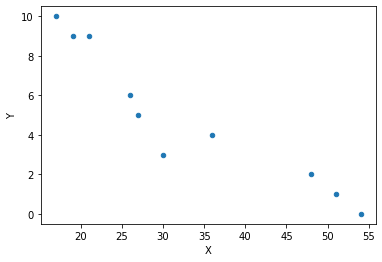

In [3]:
# Your code here.
student_data.plot( x = 'X' , y = 'Y', kind = 'scatter')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# - as the age increases, the number of tardies decreases
# - linear trend 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covariance = np.cov(student_data.X, student_data.Y)
print(covariance[0,1])

# its negative 

-45.56666666666666


In [6]:
#correlation = ((covariance[0,1])/ (np.sqrt(np.var(student_data.X)* np.var(student_data.Y))))
#print(correlation)
print(student_data.corr())
#- the values have a strong negative correlation 

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
from sklearn.linear_model import LinearRegression

x = np.array(x_values).reshape((-1 , 1))
y = np.array(y_values)

model = LinearRegression().fit( x, y)
r_sq = model.score(x, y)
print(r_sq)
print('intercept:' , model.intercept_)
print('slope:' , model.coef_)

0.8820265558250109
intercept: 12.888803363135768
slope: [-0.24282077]


In [8]:
student_data = sm.add_constant(student_data)
#x = np.array(x_values)

model_1 = sm.OLS(student_data['Y'], student_data[['const', 'X']])

results = model_1.fit()
results.summary()

/Users/ulrikeanklam/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.57e-05
Time:                        11:56:18   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# linear regression model
# response of 0.8820265558250109
# the number of tardies would be 12.888803363135768 for a student of age 0
# while the age increases by 1 the tardies decrease by -0.24282077 holding all else constant

Plot your regression model on your scatter plot.

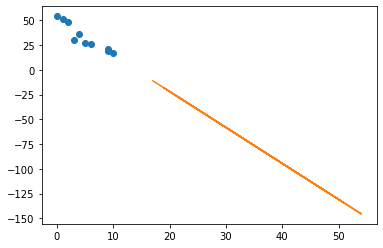

In [10]:
# Your code here.
import matplotlib.pyplot as plt
plt.plot(y, x , 'o')

m , b = np.polyfit(y , x , 1)

plt.plot ( x, m*x + b )

# how do i zoom in?

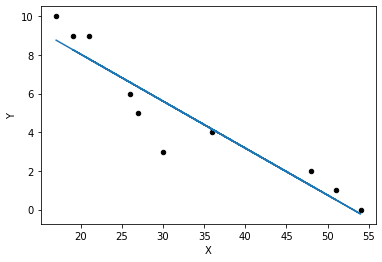

In [18]:
ax = student_data.plot( x = 'X' , y = 'Y', kind = 'scatter', color = 'black')
#ax.plot(x , results.fittedvalues)

ax.plot(student_data.X, results.predict(student_data[['const', 'X']]))

# use .predict to work with the OLS

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [37]:
# Your response here. 
#

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [46]:
# Import any libraries you may need & the data
data = pd.read_csv('vehicles.csv')
type(data)

pandas.core.frame.DataFrame

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [39]:
# Your response here. 
df = pd.DataFrame(data)
correlation_year = ( np.cov(data.Year, data['CO2 Emission Grams/Mile'])
                    / np.sqrt(np.var(data['Year']) 
                              * np.var(data['CO2 Emission Grams/Mile'])))

correlation_cylinders = (np.cov(data['Cylinders'], data['CO2 Emission Grams/Mile'])
                        / np.sqrt(np.var(data['Cylinders']) 
                                  * np.var(data['CO2 Emission Grams/Mile'])))

correlation_fuel_barrels = np.corrcoef(data['Fuel Barrels/Year'], data['CO2 Emission Grams/Mile'])

correlation_comb_mpg = np.corrcoef(data['Combined MPG'], data['CO2 Emission Grams/Mile'] )

correlation_fuel_cost = np.corrcoef(data['Fuel Cost/Year'], data['CO2 Emission Grams/Mile'])

print(correlation_year[0,1])
print(correlation_cylinders[0,1])
print(correlation_fuel_barrels[0,1])
print(correlation_comb_mpg[0,1])
print(correlation_fuel_cost[0,1])

-0.22230578635581477
0.7524134820086206
0.9861886621428727
-0.9262290389336443
0.9308651512201844


In [40]:
df.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [41]:
# Fuel Barrels/Year will have the most impact and Year the least impact

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 
data = sm.add_constant(data)
data_y = data['CO2 Emission Grams/Mile']
data_x = data[['const', 'Fuel Barrels/Year']]

data_lr = sm.OLS(data_y, data_x).fit()

data_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                             22:26:25   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel Barrels/Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#multivariable linear model
model_data =sm.add_constant(model_data)
x = data[['Year', 'Cylinders', 'Fuel Barrels/Year',
          'Combined MPG', 'Fuel Cost/Year']]
model_data = sm.OLS(data['CO2 Emission Grams/Mile'], x)

results = model_data.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Mon, 07 Sep 2020   Prob (F-statistic):                        0.00
Time:                             22:33:46   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [43]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [44]:
# Your code here. 
party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

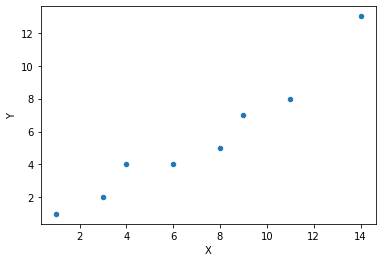

In [50]:
# Your code here.

ax = party.plot( x = 'X', y= 'Y', kind = 'scatter')
#ax.plot(x , party_lr.fittedvalues)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [52]:
# Your response here. 
party = sm.add_constant(party)
party_y = party.Y
party_x = party[['const', 'X']]

party_lr = sm.OLS(party_y, party_x).fit()

party_lr.summary()

/Users/ulrikeanklam/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           0.000102
Time:                        22:44:11   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [53]:
# Your response here. 

#first determine if something is an outlier, with boxplot, .describe()
# not just visually
party

,const,X,Y
0,1.0,1,1
1,1.0,3,2
2,1.0,4,4
3,1.0,6,4
4,1.0,8,5
5,1.0,9,7
6,1.0,11,8
7,1.0,14,13


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           0.000264
Time:                        22:52:45   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/Users/ulrikeanklam/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


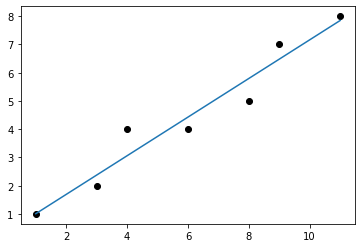

In [56]:
party_data = pd.DataFrame({'X':[1,3,4,6,8,9,11],
                           'Y': [1,2,4,4,5,7,8]})
x = sm.add_constant(party_data.X)
model = sm.OLS(party_data.Y, x).fit()

print(model.summary())
plt.scatter(party_data.X, party_data.Y, color = 'black')
plt.plot(party_data.X, model.predict(x))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 